In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [3]:
train = pd.read_csv('insurance_training_data.csv')
test = pd.read_csv('insurance-evaluation-data.csv')

# Drop the index column
train = train.drop('INDEX', axis=1)
test = test.drop('INDEX', axis=1)
train.head()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


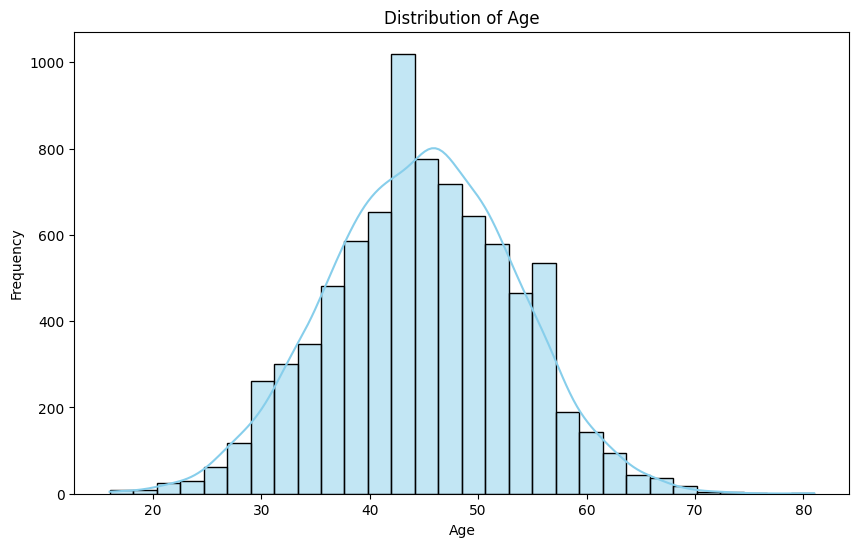

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='AGE', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

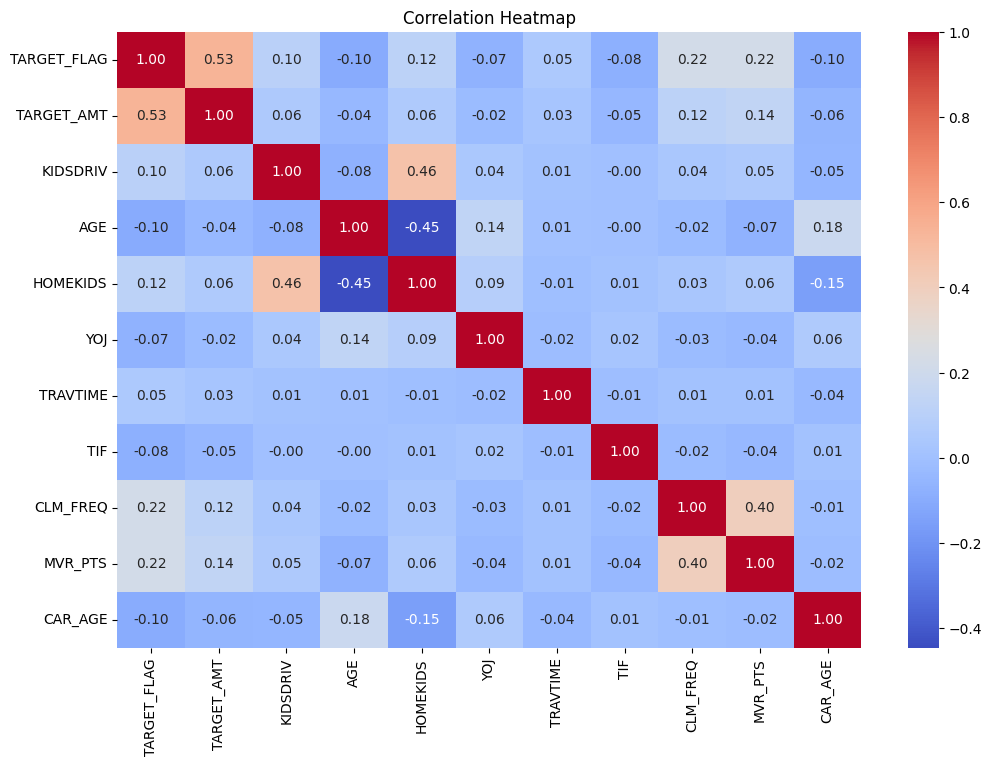

In [5]:
plt.figure(figsize=(12, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

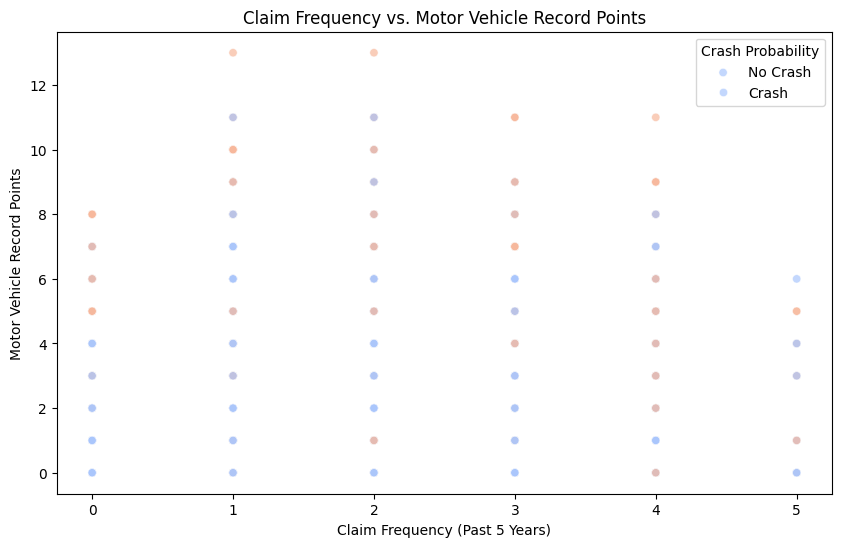

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='CLM_FREQ', y='MVR_PTS', hue='TARGET_FLAG', palette='coolwarm', alpha=0.7)
plt.title('Claim Frequency vs. Motor Vehicle Record Points')
plt.xlabel('Claim Frequency (Past 5 Years)')
plt.ylabel('Motor Vehicle Record Points')
plt.legend(title='Crash Probability', loc='upper right', labels=['No Crash', 'Crash'])
plt.show()

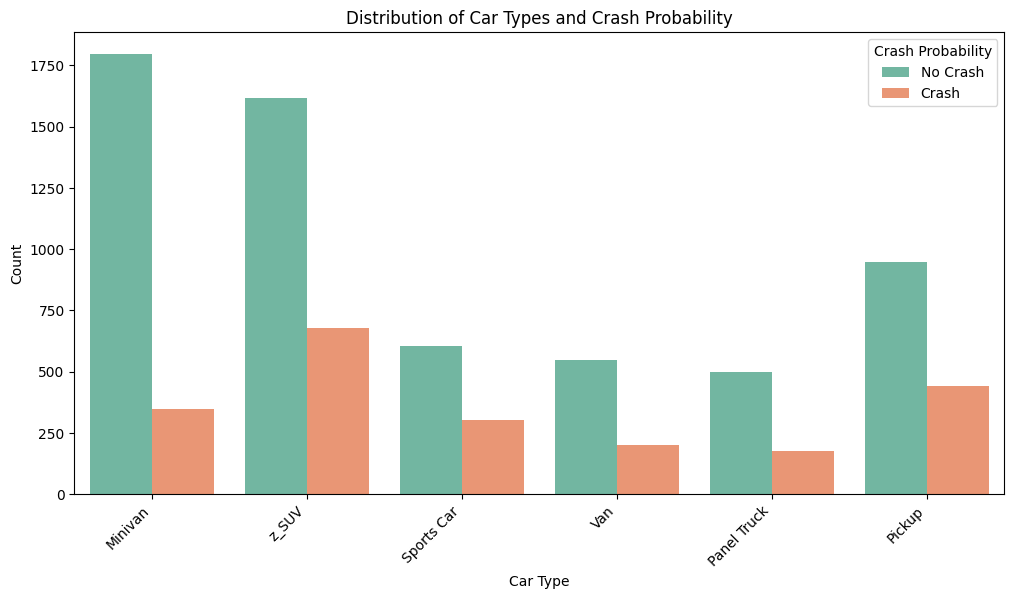

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='CAR_TYPE', hue='TARGET_FLAG', palette='Set2')
plt.title('Distribution of Car Types and Crash Probability')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crash Probability', labels=['No Crash', 'Crash'])
plt.show()

In [8]:
column_types = train.dtypes
print(column_types)

TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object


In [9]:
# Convert object columns to numeric
train['INCOME'] = pd.to_numeric(train['INCOME'].str.replace('[\$,]', ''), errors='coerce')
train['HOME_VAL'] = pd.to_numeric(train['HOME_VAL'].str.replace('[\$,]', ''), errors='coerce')
train['BLUEBOOK'] = pd.to_numeric(train['BLUEBOOK'].str.replace('[\$,]', ''), errors='coerce')
train['OLDCLAIM'] = pd.to_numeric(train['OLDCLAIM'].str.replace('[\$,]', ''), errors='coerce')
train['MSTATUS'] = train['MSTATUS'].replace('z_No', 'No')
train['SEX'] = train['SEX'].replace('z_F', 'F')

# Convert object columns to numeric
test['INCOME'] = pd.to_numeric(test['INCOME'].str.replace('[\$,]', ''), errors='coerce')
test['HOME_VAL'] = pd.to_numeric(test['HOME_VAL'].str.replace('[\$,]', ''), errors='coerce')
test['BLUEBOOK'] = pd.to_numeric(test['BLUEBOOK'].str.replace('[\$,]', ''), errors='coerce')
test['OLDCLAIM'] = pd.to_numeric(test['OLDCLAIM'].str.replace('[\$,]', ''), errors='coerce')
test['MSTATUS'] = test['MSTATUS'].replace('z_No', 'No')
test['SEX'] = test['SEX'].replace('z_F', 'F')


# Print updated column types
column_types = train.dtypes
print(column_types)


C:\Users\GLANVK\AppData\Local\Temp\1\ipykernel_4968\818570206.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['INCOME'] = pd.to_numeric(train['INCOME'].str.replace('[\$,]', ''), errors='coerce')
C:\Users\GLANVK\AppData\Local\Temp\1\ipykernel_4968\818570206.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['HOME_VAL'] = pd.to_numeric(train['HOME_VAL'].str.replace('[\$,]', ''), errors='coerce')
C:\Users\GLANVK\AppData\Local\Temp\1\ipykernel_4968\818570206.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train['BLUEBOOK'] = pd.to_numeric(train['BLUEBOOK'].str.replace('[\$,]', ''), errors='coerce')
C:\Users\GLANVK\AppData\Local\Temp\1\ipykernel_4968\818570206.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['OLDCLAIM'] = pd.to_numeric(train['OLDCLAIM'].str.replace

TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK         int64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM         int64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object


C:\Users\GLANVK\AppData\Local\Temp\1\ipykernel_4968\818570206.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  test['OLDCLAIM'] = pd.to_numeric(test['OLDCLAIM'].str.replace('[\$,]', ''), errors='coerce')


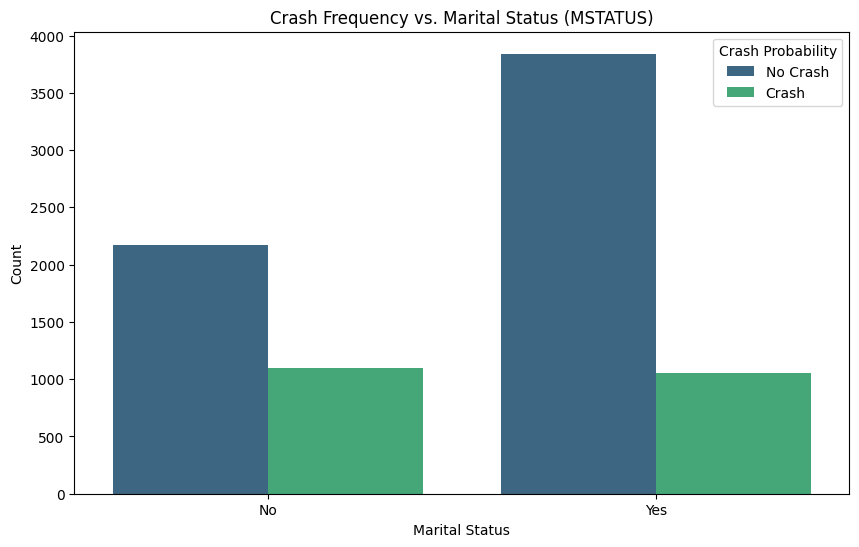

In [10]:
# Bar graph for Crash Frequency vs. MSTATUS
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='MSTATUS', hue='TARGET_FLAG', palette='viridis')
plt.title('Crash Frequency vs. Marital Status (MSTATUS)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Crash Probability', labels=['No Crash', 'Crash'])
plt.show()

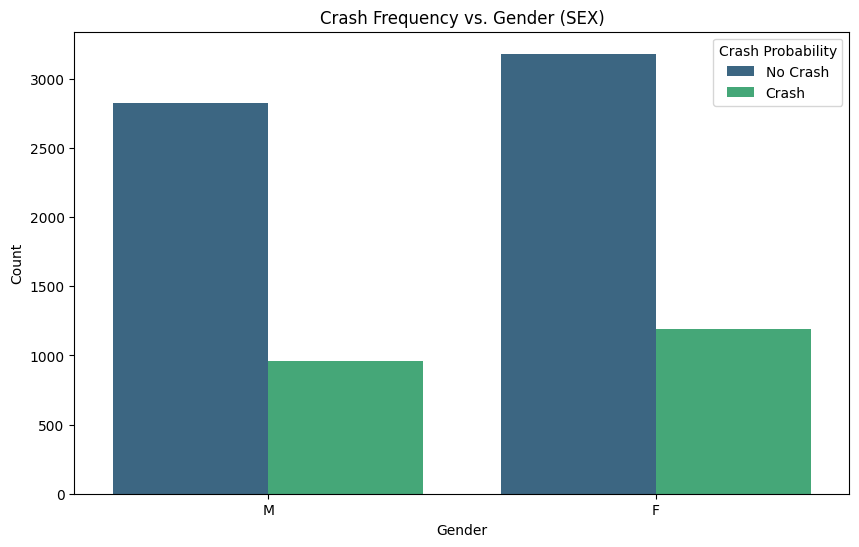

In [11]:
# Bar graph for Crash Frequency vs. SEX
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='SEX', hue='TARGET_FLAG', palette='viridis')
plt.title('Crash Frequency vs. Gender (SEX)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Crash Probability', labels=['No Crash', 'Crash'])
plt.show()

In [12]:
# Assuming 'test' is your DataFrame
nan_count = train.isna().sum()

# Print the number of NaN values for each column
print(nan_count)


TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64


In [13]:
numerical_columns = ['YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE', 'AGE']
for col in numerical_columns:
    median_valuet = test[col].median()
    test[col] = test[col].fillna(median_valuet)

for col in numerical_columns:
    median_value = train[col].median()
    train[col] = train[col].fillna(median_value)

In [14]:
# Impute NaN values in categorical columns with 'Unknown'
train['JOB'] = train['JOB'].fillna('Unknown')
test['JOB'] = test['JOB'].fillna('Unknown')

In [15]:
# Check if there are still NaN values after imputation
nan_count_after_imputation = train.isna().sum()
print("Number of NaN values after imputation:")
print(nan_count_after_imputation)

Number of NaN values after imputation:
TARGET_FLAG    0
TARGET_AMT     0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64


In [16]:
# Define features and target
X_flag = train.drop(['TARGET_FLAG', 'TARGET_AMT'], axis=1)
y_flag = train['TARGET_FLAG']

# Convert categorical variables to dummies
X_flag = pd.get_dummies(X_flag, drop_first=True)

# Split the data into training and testing sets
X_train_flag, X_test_flag, y_train_flag, y_test_flag = train_test_split(X_flag, y_flag, test_size=0.2, random_state=42)

# Binary Logistic Regression
log_reg_flag = LogisticRegression(random_state=42)
log_reg_flag.fit(X_train_flag, y_train_flag)

# Evaluate the model
y_pred_flag = log_reg_flag.predict(X_test_flag)
print(confusion_matrix(y_test_flag, y_pred_flag))
print(classification_report(y_test_flag, y_pred_flag))

[[1158   31]
 [ 418   26]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.84      1189
           1       0.46      0.06      0.10       444

    accuracy                           0.73      1633
   macro avg       0.60      0.52      0.47      1633
weighted avg       0.66      0.73      0.64      1633



In [17]:
# Define features and target
X_amt = train.drop(['TARGET_FLAG', 'TARGET_AMT'], axis=1)
y_amt = train['TARGET_AMT']

# Convert categorical variables to dummies
X_amt = pd.get_dummies(X_amt, drop_first=True)

# Split the data into training and testing sets
X_train_amt, X_test_amt, y_train_amt, y_test_amt = train_test_split(X_amt, y_amt, test_size=0.2, random_state=42)

# Linear Regression for predicting continuous variable
lin_reg_amt = LinearRegression()
lin_reg_amt.fit(X_train_amt, y_train_amt)

# Evaluate the model
y_pred_amt = lin_reg_amt.predict(X_test_amt)
print('Mean Squared Error:', mean_squared_error(y_test_amt, y_pred_amt))
print('R-squared:', r2_score(y_test_amt, y_pred_amt))

Mean Squared Error: 28992700.242169943
R-squared: 0.061593652624510664


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train_flag', 'y_train_flag' are your training data
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_flag, y_train_flag)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters
best_rf_classifier = grid_search.best_estimator_
y_pred_flag_optimized = best_rf_classifier.predict(X_test_flag)
print(confusion_matrix(y_test_flag, y_pred_flag_optimized))
print(classification_report(y_test_flag, y_pred_flag_optimized))


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
[[1124   65]
 [ 282  162]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1189
           1       0.71      0.36      0.48       444

    accuracy                           0.79      1633
   macro avg       0.76      0.66      0.67      1633
weighted avg       0.78      0.79      0.76      1633



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor  # Add this import

# Assuming 'X_train_amt', 'y_train_amt' are your training data for regression
# Initialize RandomForestRegressor with the best hyperparameters
rf_regressor = RandomForestRegressor(**best_params, random_state=42)

# Train the model
rf_regressor.fit(X_train_amt, y_train_amt)

# Evaluate the model
y_pred_amt = rf_regressor.predict(X_test_amt)
print('Mean Squared Error:', mean_squared_error(y_test_amt, y_pred_amt))
print('R-squared:', r2_score(y_test_amt, y_pred_amt))



Mean Squared Error: 28417014.63468123
R-squared: 0.08022686110967148


In [22]:
from sklearn.feature_selection import SelectFromModel

# Binary Logistic Regression with Feature Selection
log_reg_flag = LogisticRegression(random_state=42)

# Use SelectFromModel for feature selection
feature_selector_flag = SelectFromModel(log_reg_flag)
X_train_flag_selected = feature_selector_flag.fit_transform(X_train_flag, y_train_flag)
X_test_flag_selected = feature_selector_flag.transform(X_test_flag)

# Train the model with selected features
log_reg_flag.fit(X_train_flag_selected, y_train_flag)

# Evaluate the model
y_pred_flag = log_reg_flag.predict(X_test_flag_selected)
print(confusion_matrix(y_test_flag, y_pred_flag))
print(classification_report(y_test_flag, y_pred_flag))

[[1122   67]
 [ 352   92]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1189
           1       0.58      0.21      0.31       444

    accuracy                           0.74      1633
   macro avg       0.67      0.58      0.57      1633
weighted avg       0.71      0.74      0.70      1633



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Linear Regression with Feature Selection
lin_reg_amt = LinearRegression()

# Use SelectFromModel for feature selection
feature_selector_amt = SelectFromModel(lin_reg_amt)
X_train_amt_selected = feature_selector_amt.fit_transform(X_train_amt, y_train_amt)
X_test_amt_selected = feature_selector_amt.transform(X_test_amt)

# Train the model with selected features
lin_reg_amt.fit(X_train_amt_selected, y_train_amt)

# Evaluate the model
y_pred_amt = lin_reg_amt.predict(X_test_amt_selected)
print('Mean Squared Error:', mean_squared_error(y_test_amt, y_pred_amt))
print('R-squared:', r2_score(y_test_amt, y_pred_amt))

Mean Squared Error: 29467483.956893705
R-squared: 0.04622633437523449
